# Genre classification using 30 second audio features

**Vivek Vijayan**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/enter-opy/genre-classification/blob/main/notebooks/30sec_audiofeatures.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data preprocessing

In [2]:
df = pd.read_csv('../Data/features_30_sec.csv')
df = df.drop(columns=['filename', 'length'])
df.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,2.555262e+06,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,8.660900e+06,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [3]:
X = df.drop(columns=['label'])
y = np.array(df['label'].tolist()).reshape(-1, 1)

### Label encoding

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y.ravel())

### Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
29,0.280357,0.105621,0.124736,0.004812,1648.835169,712342.593798,2189.985865,185296.921351,3759.892114,4.161772e+06,...,-8.310135,84.208382,-11.384393,98.334000,-6.723499,96.627716,-10.013582,74.162971,-14.026128,77.931458
535,0.264600,0.089984,0.091492,0.001231,844.084418,51342.065119,1104.420736,26308.920034,1608.486974,4.285867e+05,...,1.125303,43.192551,-1.974342,35.841900,-5.219293,65.051285,-1.866610,42.781399,-3.503479,53.901234
695,0.529182,0.068875,0.185447,0.003780,2446.267671,257141.784822,2331.010128,55816.095450,5192.807708,8.364536e+05,...,9.323952,32.028889,-6.608163,33.616463,3.498461,48.407642,-3.286584,37.829609,3.655154,31.723753
557,0.234168,0.092644,0.078136,0.002283,1378.524274,168329.629531,1773.676404,86900.504631,2584.908654,8.896191e+05,...,-4.048587,49.173058,-1.498452,73.097794,-3.520071,94.470222,-6.187496,113.834229,-7.340963,90.994820
836,0.434649,0.093606,0.079984,0.003172,1810.952863,654461.458880,2166.280664,182317.147014,4118.229261,2.871598e+06,...,5.381378,69.861420,0.286342,82.497223,5.014830,57.189030,-0.334739,74.218369,-0.855825,63.519684


### Scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [8]:
accuracy = dict()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = lr.predict(X_test)

In [12]:
accuracy['Logistic regression'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Logistic regression']:.2f}%")

Test Accuracy: 69.50%


## Support vector machine

In [13]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [14]:
y_pred = svm_clf.predict(X_test)

In [15]:
accuracy['Support vector machine'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Support vector machine']:.2f}%")

Test Accuracy: 70.00%


## Decision tree classifier

In [16]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt_clf.predict(X_test)

In [18]:
accuracy['Decision tree'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Decision tree']:.2f}%")

Test Accuracy: 46.50%


## k-nearest neighbors

In [19]:
max_accuracy = 0.0

for k in range(25):
    curr_knn_clf = KNeighborsClassifier(n_neighbors=k+1, metric='euclidean')
    curr_knn_clf.fit(X_train, y_train)

    y_pred = curr_knn_clf.predict(X_test)
    
    curr_accuracy = accuracy_score(y_test, y_pred) * 100

    if curr_accuracy > max_accuracy:
        max_accuracy = curr_accuracy
        knn_clf = curr_knn_clf

In [20]:
y_pred = knn_clf.predict(X_test)

In [21]:
accuracy['k-nearest neighbors'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['k-nearest neighbors']:.2f}%")

Test Accuracy: 68.00%


## Artificial neural networks

In [22]:
ann_clf = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000)
ann_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000)

In [23]:
y_pred = ann_clf.predict(X_test)

In [24]:
accuracy['Artificial neural network'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Artificial neural network']:.2f}%")

Test Accuracy: 74.50%


## Random forest (Ensemble methods)

In [25]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = rf_clf.predict(X_test)

In [27]:
accuracy['Random forest'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Random forest']:.2f}%")

Test Accuracy: 67.50%


## Result

In [28]:
df_accuracy = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])
df_accuracy

,Model,Accuracy
0,Logistic regression,69.5
1,Support vector machine,70.0
2,Decision tree,46.5
3,k-nearest neighbors,68.0
4,Artificial neural network,74.5
5,Random forest,67.5


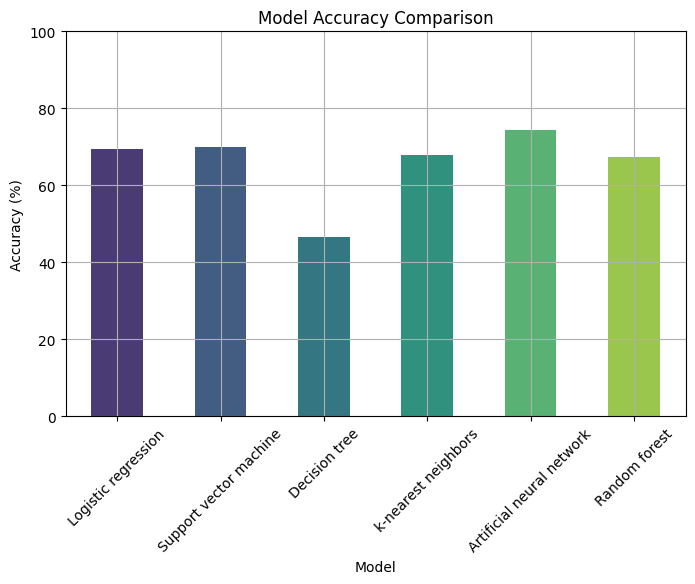

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, hue='Model', palette='viridis', width=0.5)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Discussion
- ANNs performs the best with `accuracy > 74%` for 30 sec audio features
- Decision trees performs the worse with `accuracy < 50%`
- Overall performance has improved compared to 30 sec audio features